# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 3: Introduction to Machine Learning (Gradient Descent, Logistic Regression)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Dai | Wuran | Dai Wuran, 2024-11-07 | 8 | 25 |
| Member 2: | Fre | Ashal | Fre Ashal, 2024-11-07 | 8 | 25 |
| Member 3: | De-graft | Godwyll | De-graft Godwyll, 2024-11-07 | 8 | 25 |
| Member 4: | Kwadwo | Asare-Menako | Kwadwo Asare-Menako, 2024-11-07 | 8 | 25 |


# **Non-linear Gradient Descent (25 marks)**

### **Observations:** Pseudorange [m]

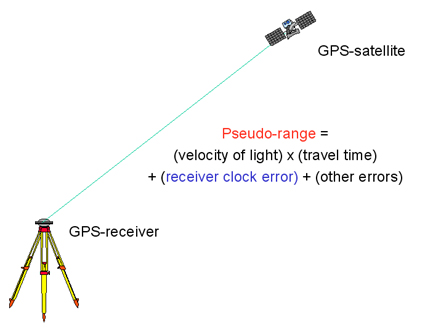

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them using Gradient Descent method


.

###Step 0: Setup & Intialization

Step 0.1: Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 0.2: Read and parse data files

In [ ]:
df_pseudorange = pd.read_excel('pseudoranges1.xlsx')
df_sat_pos = pd.read_excel('satellite_position1.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos =df_sat_pos[['x','y','z']].to_numpy()

n = pseudorange.size

Step 0.3: Define the groundtruth of receiver's position in ECEF (m)

In [ ]:
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

Step 0.4: Intialize empty arrays

In [ ]:
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

Step 0.5: Function that
computes the euclidean distance between satellite and receiver

In [ ]:
def euclidean_norm(receiver_pos, satellite_pos):

    # Calculate the Euclidean norm (distance)
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)

    return distance

### Step 1: Define the Cost Function (4 marks)
Define a cost function that computes the sum of squared residuals between measured and predicted pseudoranges.

The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.

The function returns a single scalar.

Call euclidean_norm function to calculate geometric distance.

In [ ]:
# Cost function: sum of squared residuals between measured and predicted pseudoranges
def cost_function(r_pos, cdT, s_pos, pseudorange):
    L = 0
    # Calculate the predicted pseudorange for each satellite
    predicted_pseudorange = euclidean_norm(s_pos, r_pos) + cdT
    L = np.sum((pseudorange - predicted_pseudorange)**2) / n
    return L

### Step 2: Define the Gradient Computation Function (4 marks)

Define a gradient computation function that calculates the gradient of the cost function with respect to the estimates (x_r, y_r, z_r, cdT).


The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.


The function returns a 1D numpy array that contains 4 elements.


Call euclidean_norm function to calculate geometric distance.


In [ ]:
# Gradient of the cost function with respect to the unknowns (x_r, y_r, z_r, cdT)
def gradient(r_pos, cdT, s_pos, pseudorange):
    grad = np.zeros(4)
    predicted_pseudorange = euclidean_norm(s_pos, r_pos) + cdT
    for i in range(n):
      # Unit vector components in the direction from receiver to satellite
      unit_vector = (r_pos - s_pos[i]) / euclidean_norm(s_pos, r_pos)[i]
      # Gradient calculation
      grad[:3] += -2/n * (pseudorange[i] - predicted_pseudorange[i]) * unit_vector
      grad[3] += -2/n * (pseudorange[i] - predicted_pseudorange[i])
    return grad

### Step 3: Gradient Descent Implementation (4 marks)
Construct the implementation function of gradient descent

Replace '...' with actual implementation

The function's input are: observed pseudoranges, satellites' positions, learning_rate, maximum loop iterations, tolerance

The function will return a 1D numpy array that contains the optimized estimates (x_r, y_r, z_r, cdT)

The function set learning_rate, max_iters and tolerance as: 0.01, 100000, 1e-6 as default values

These default hyperparameters values can be overridden by passing your own values when calling the function


In [ ]:
# Gradient descent algorithm for non-linear least squares estimation
def gradient_descent(pseudorange, s_pos, learning_rate=0.1, max_iters=10000, tolerance=1e-6):

    global steps_count

    #initalize the estimates as zeros
    X = np.array([0,0,0,0])

    for iteration in range(max_iters):
        r_pos = X[:3]
        cdT = X[3]

        # compute the cost in the current step
        # (1 mark)
        current_cost = cost_function(r_pos, cdT, s_pos, pseudorange)

        # compute the gradients in the current step
        # (1 mark)
        grad = gradient(r_pos, cdT, s_pos, pseudorange)


        # update estimates
        # (1 mark)
        X_new = X - learning_rate * grad

        # compute the new cost
        # (1 mark)
        new_cost = cost_function(X_new[:3], X_new[3], s_pos, pseudorange)

        # break the loop if converge
        if np.abs(new_cost - current_cost) < tolerance:
            print("Converged !")
            steps_count=iteration
            break

        # update the parameters for the next iteration
        X = X_new

        #collect intermediate results for cost and gradients
        arr_cost.append(current_cost)
        arr_grad.append(grad)
        arr_err.append(X[:3]-GroundTruth)

    return X

### Step 4: Parameters Optimization & Results Printing (3 marks)

Call *gradient_descent* function to optimize the estimating parameters using default optimization hyperparameters

Print:

*   optimized parameters
*   final position errors of receiver
*   number of steps taken for convergence
*   final cost value
*   final gradient values








In [ ]:
optimized_params = gradient_descent(pseudorange, sat_pos)

# print the mentioned metrics
print("Optimized Parameters:", optimized_params)
print("Final Position Errors:", arr_err[-1])
print("Number of Steps:", steps_count)
print("Final Cost Value:", arr_cost[-1])
print("Final Gradient Values:", arr_grad[-1])

Converged !
Optimized Parameters: [-1.63349244e+06 -3.65162953e+06  4.95248539e+06  6.44838347e+00]
Final Position Errors: [-3.06240566 -2.34631388  3.77147769]
Number of Steps: 2963
Final Cost Value: 0.5634455009259777
Final Gradient Values: [ 0.00015542  0.00086601 -0.00266161 -0.00150894]


### Step 5: Cost vs Steps Plot & Analysis (2 marks)
Plot cost vs steps

Use 'semilogy' to scale y-axis

Label each axis

Include figure title

Comment on the pattern from the plot

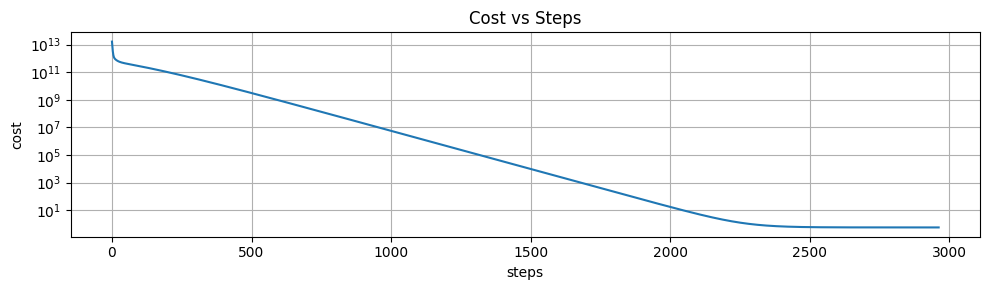

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))

ax.semilogy(arr_cost)
ax.set_xlabel('steps')
ax.set_ylabel('cost')
ax.set_title('Cost vs Steps')

ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
"""
From the figure below we can see that, with the increase of steps, the value of cost is decreasing.
Cost decreases at an exponentially rate in the range about 0 to 2250, then the changes get smaller
and smaller with steps. Finally at the step of 2963, the change (current_cost - new_cost) is less
than the tolerance, so the model converges.
"""

### Step 6: Gradients vs Steps & Analysis(2 marks)
Plot gradients vs steps

use 'symlog' to scale y-axis

use 'tick_params' and set y-axis: labelsize=8

include axes' labels, legends and title

Comment on the pattern from the plot

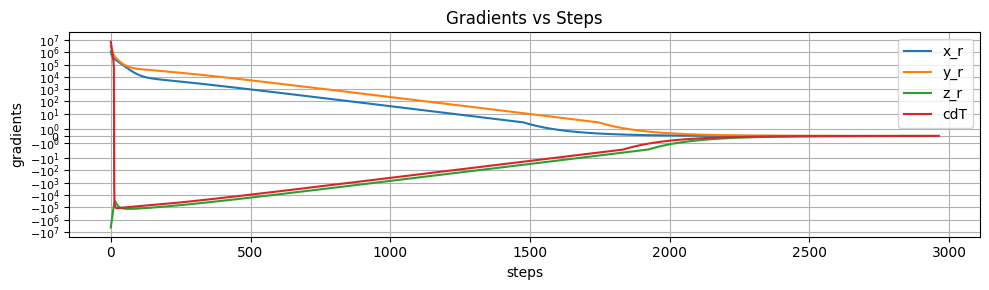

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))

ax.plot(arr_grad)
ax.set_yscale('symlog')
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('steps')
ax.set_ylabel('gradients')
ax.set_title('Gradients vs Steps')
ax.legend(['x_r', 'y_r', 'z_r', 'cdT'])

ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
"""
From about 0 to 2200, the gradients of x_r and y_r decrease exponentially, while the value of z_r and cdT
increase, this is to do with the directions of their gradients. Similarly, after 2200, the changes in
all the gradients become smaller and smaller till the model converges.
"""

### Step 7: Positioning errors vs Steps & Analysis(2 marks)
Plot positioning errors vs steps

Include axes' labels, legends and title

Comment on the pattern of the plot

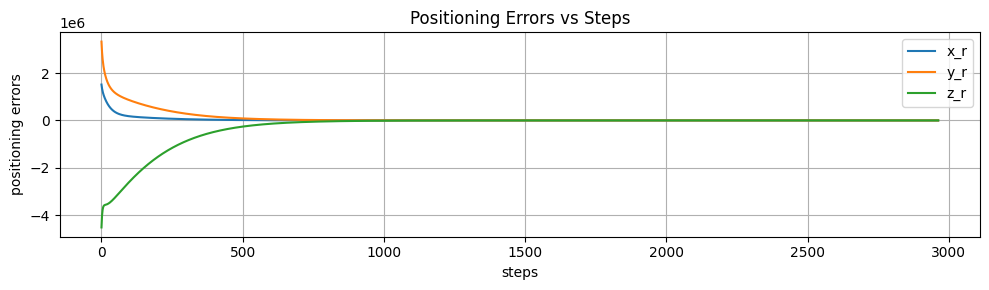

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

ax.plot(arr_err)
ax.set_xlabel('steps')
ax.set_ylabel('positioning errors')
ax.set_title('Positioning Errors vs Steps')
ax.legend(['x_r', 'y_r', 'z_r'])

ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
"""
Because the errors are computed from estimated pisitions([0,0,0] for the beginning) minus
ground truth ([-1633489.37967725,	-3651627.18250363,	4952481.61954918]), so the value of
x_r and y_r errors are positive, while the value of z_r error is negative, causing the increase
of z_r error on the figure. By the absolute values from the figure, we can tell that the
differences between x_r, y_r, z_r and true value is getting smaller, and the differences become
smaller and smaller, which means the model is converging.
"""

# Hyperparameters Tuning

### Step 8: Tuning Learning rate (2 marks)

Change learning rate to 0.01, 0.001 and repeat step 4.

(*hint: you may need to adjust the maximum loop iterations in this case*)

In [ ]:
#set learning rate to 0.01
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_2 = gradient_descent(pseudorange, sat_pos, 0.01, 30000)

# print the metrics
print("Optimized Parameters:", optimized_params_2)
print("Final Position Errors:", arr_err[-1])
print("Number of Steps:", steps_count)
print("Final Cost Value:", arr_cost[-1])
print("Final Gradient Values:", arr_grad[-1])

Converged !
Optimized Parameters: [-1.63349244e+06 -3.65162950e+06  4.95248530e+06  6.39730403e+00]
Final Position Errors: [-3.05714443 -2.31699848  3.68137918]
Number of Steps: 27900
Final Cost Value: 0.5641548595389249
Final Gradient Values: [ 0.00048857  0.00272232 -0.00836684 -0.0047434 ]


In [ ]:
#set learning rate to 0.001
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_3 = gradient_descent(pseudorange, sat_pos, 0.001, 300000)

# print the metrics
print("Optimized Parameters:", optimized_params_3)
print("Final Position Errors:", arr_err[-1])
print("Number of Steps:", steps_count)
print("Final Cost Value:", arr_cost[-1])
print("Final Gradient Values:", arr_grad[-1])

Converged !
Optimized Parameters: [-1.63349242e+06 -3.65162941e+06  4.95248502e+06  6.23556836e+00]
Final Position Errors: [-3.04048553 -2.2241755   3.39609526]
Number of Steps: 260921
Final Cost Value: 0.5712616917838825
Final Gradient Values: [ 0.00154538  0.00861082 -0.02646466 -0.01500358]


## Step 9: Results Analysis (2 marks)

Q1. Comment on the difference that you notice after changing the learning rate. (1 mark)

Q2. What is the difference between LSE and Gradient Descent? (Comment based on your results and the methodology) (1 mark)



ANSWER HERE

---

A1. The number of steps and time required for the model to converge increases as the learning rate decreases, while other variables change very little.

A2. Least Squares Estimation (LSE) is a direct method that provides an exact solution, ideal for linear problems, while Gradient Descent is an iterative approach that gradually adjusts parameters to approximate the optimal solution, suitable for nonlinear and large-scale data.

Nonlinear LSE shows faster convergence. Gradient descent may require more iterations to approach the optimal value, especially if a low learning rate is chosen. From our results of both Non_Linear LSE and Gradient Descent solving SPP, the final value of estimated positions of receivers and errors seem to be really closed, but Non_Linear LSE only requires 5 iterations to converge, while Gradient Descent needs 2963 steps with the learning rate of 0.1.

---

# **Logistic Regression (50 marks)**

The following dataset helps to predict phishing webpages. It is collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.

It can be downloaded from : https://archive.ics.uci.edu/dataset/327/phishing+websites

<u>Class labels:</u>

Not phishing = -1

Phishing = 1



Follow the steps provided to perform binary classification using logistic regression and complete the code for each part.


### Step 0: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Data Input (2 mark)

Use the `fetch_ucirepo(id=<ID>)`  to load the phishing dataset (id = 327) as a dataframe into the feature matrix `X` and target vector `y`.

Print the size of `X` and `y`


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Below code fetches dataset
phishing_websites = fetch_ucirepo(id=327)

# TO DO: data (as pandas dataframes) (1 mark)
X = pd.DataFrame(phishing_websites.data.features)
y = pd.DataFrame(phishing_websites.data.targets)
# TO DO: display sizes of X and y (1 mark)
print("Size of X:", X.shape)
print("Size of y:", y.shape)

Size of X: (11055, 30)
Size of y: (11055, 1)


### Step 2.1: Class label histogram (2 marks)

Plot the histogram for each class label to visualise class imbalance. Additionally before calling .show() for the plot, ensure that the code displays you the exact value of the samples for each class above the respective bins.

result
 1        6157
-1        4898
Name: count, dtype: int64


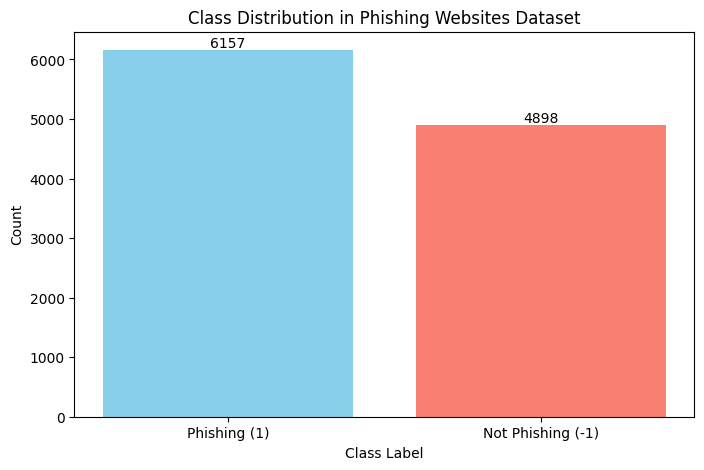

In [ ]:
# TO DO: Check the class distribution of y (2 mark)
class_counts = y.value_counts()
print(class_counts)

# Display exact values for each bin in the histogram
class_labels = list(range(len(class_counts)))  # Create simple numeric labels for each class
class_values = class_counts.values

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(class_labels, class_values, color=['skyblue', 'salmon'], tick_label=["Phishing (1)", "Not Phishing (-1)"])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  # Offset to position the label slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel("Class Label")
ax.set_ylabel("Count")
ax.set_title("Class Distribution in Phishing Websites Dataset")

plt.show()

### Step 2.2: Smaller dataset creation(2 mark)


We also want to test if the model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

Use random_state = 42


In [ ]:
# TO DO: Create a smaller dataset with 3% of the data
from sklearn.model_selection import train_test_split
X_small, _, y_small, _ = train_test_split(X, y, train_size=0.03, random_state=42)

# TO DO: display sizes of X_small and y_small (2 mark)
print("Size of X:", X_small.shape)
print("Size of y:", y_small.shape)

Size of X: (331, 30)
Size of y: (331, 1)


### Step 3: Implement Machine Learning Model (6 marks)

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y` (1 mark)
    - Only first two columns of `X` and `y` (1 mark)
    - `X_small` and `y_small` (1 mark)

### Step 4: Test Model (6 x 3 = 18 marks)

Calculate the following for the **three different tests** implemented in Step 3
1. data size (1 mark)
1. number of training samples (1 mark)
2. number of testing samples (1 mark)
4. training accuracy (1 marks)
5. testing accuracy (1 marks)
6. log loss (1 mark)

### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training samples, testing samples, training accuracy, testing accuracy, log loss
2. Add these columns for each dataset to the `results` DataFrame
3. Print `results`

For any **random state** parameters from this step onwards, you can use random_state = 0;

In [ ]:
#TO DO: Complete steps 3,4, and 5.1 in this code block (Total 27 marks)

# Step 3 & 4
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Instantiate model
model = LogisticRegression(max_iter=2000)

# A function that calculates all required information
def calculate_metrics(model, X, y):
    y = y.values.ravel()
    results = []

    # Split the data : 70% training set, 30% testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Model fitting
    model.fit(X_train, y_train)

    # Calculating
    y_pred = model.predict_proba(X_test)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    log_loss_value = log_loss(y_test, y_pred)

    # Results
    results = [X.shape, X_train.shape[0], X_test.shape[0], accuracy_train, accuracy_test, log_loss_value]

    return results

# Results of three datasets
results_1 = calculate_metrics(model, X, y)
results_2 = calculate_metrics(model, X.iloc[:, :2], y)
results_3 = calculate_metrics(model, X_small, y_small)

# Step 5
# Note: 70% training set, 30% testing set
# HINT: create a function that calculates all required information
results = pd.DataFrame(columns=['Data size', 'training samples', 'testing samples', 'training accuracy', 'testing accuracy', 'log loss'])
results.loc[0] = results_1
results.loc[1] = results_2
results.loc[2] = results_3
print(results)


     Data size  training samples  testing samples  training accuracy  \
0  (11055, 30)              7738             3317           0.931119   
1   (11055, 2)              7738             3317           0.554019   
2    (331, 30)               231              100           0.948052   

   testing accuracy  log loss  
0          0.921917  0.187942  
1          0.577329  0.677354  
2          0.930000  0.192311  


### Step 5.2: Visualize Classification Errors (6 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [ ]:
# TO DO: Retrieve target vector and predicted values for testing set using full dataset and print the dimension of the predicted output (2 marks)
# Note: 70% training set, 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
print("Predicted output dimensions:", y_pred.shape)

Predicted output dimensions: (3317,)


Text(113.9222222222222, 0.5, 'true value')

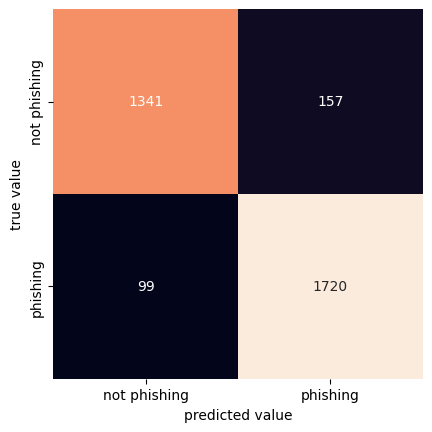

In [ ]:
import seaborn as sns

# TO DO: Calculate confusion matrix (2 marks) : conf_mat
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

# TO DO: Print confusion matrix (1 mark)
# Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat, xticklabels=['not phishing', 'phishing'],  yticklabels=['not phishing', 'phishing'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
# TO DO: Print classification report (2 marks)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.91      1498
           1       0.92      0.95      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



### Questions (11 marks)
1. Is the dataset imbalanced? Does it affect model performance? (1 mark)
2. Does the model overfit or underfit for each of the 3 cases? (3 marks)
3. How do the training and testing accuracy change depending on the amount of data used? Explain with values. (1 mark)
4. In this case, what do a false positive and a false negative represent? Which one is worse? (2 marks)
5. Based on your answer to question 4, would you want to maximize precision or recall? How would you do this? (2 marks)
6. Based on the Log Loss for each of the 3 cases, what can you say about the model in each instance? What is potentially causing these differences? (2 mark)


ANSWER HERE

---


1. Yes, the dataset is a bit imbalanced, the percentage of Phishing is 55.69%, while Not Phishing is 44.31%. The ideal balanced two classes dataset in machine learning should have around 50% of samples labeled as A and 50% as B.

  Yes, an imbalanced dataset can affect model performance. In classification tasks, models trained on imbalanced data tend to be biased toward the majority class, often predicting it more frequently.This can lead to poor performance on the minority class, resulting in low recall or precision for that class. Just from the confusion matrix above we can see that, the recall of the Phishing dataset is 0.95, which is 5% greater than the Not Phishing dataset.

2. For the first case, the model has really closed and high accuracy on both training (0.931119) and testing (0.921917) dataset, which means it is neither underfitting nor overfitting.

  For the second case, the model only has 0.554019 accuracy on the training data, which means the underfitting of the model that also results in the same poor performance on the testing data (accuracy of 0.577329).

  The third case is somehow same as the first case, it also has really closed and high accuracy, 0.948052 on training data and 0.930000 on the testing data, indicating the good performance of the model on both dataset.

3. When using the full dataset, the model has high training (0.931119) and testing accuracy (0.921917).

  When the amount of features reduced significantly, the model shows the poor performance on both traning and tesing dataset, which are decreased to 0.554019 and 0.577329, this shows the underfitting of the model because there are too less features for the model to learn from.

  When the features remain the same but less amount of dataset, the model accuracy on both training and testing dataset increased a bit to 0.948052 and 0.930000. This is because model always tent to class more accurately on few dataset.

4. A false positive represents the Not Phishing data being classified as Phishing, while a false negetive represents the Phishing data being classified as Not Phishing. A false negetive may be worse because it is more dangerous if you identify a Phishing email as Not Phishing, which may cause some security problem.

5. Because of a false negetive is more dangerous, so it is important to reduce the amount of it. We can achive it by maximizing the recall as the formula is TP/(TP + FN), so when the recall is higher it means the amount of false negetive is reduced.

  We can reduce the threshold for the model to classify the data as Phishing. Also we can deal with the imbalanced dataset to make it more balanced, which may results in high recall.

6. The log loss for the full dataset is 0.187942, for the dataset with only two features is 0.677354, and for the 3% dataset is 0.192311, which is pretty closed to the first dataset.

  This suggests that the log loss is significantly affected by the absence of certain features, while reducing the amount of data for training and testing has a way smaller effect on the log loss. In this case, it can be concluded that having more features for the model to learn from is significant for accurate classification. As for the amount of dataset, model tends to make similar results both on few and more amount of training and testing dataset with the same features.

---